In [1]:
import os
import numpy as np
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
from scripts.models import Segmentation_Network_full
from scripts.dataset import H5Dataset
from scripts.utils import plot_loss, plot_accuracy

from scripts.trainer import Trainer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training on ACDC

In [7]:
15*200/60/24

2.0833333333333335

In [2]:
out_dir = './models/ACDC'

if os.path.exists(out_dir):
    print("path exists")
else:
    os.makedirs(out_dir)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

path exists


In [3]:
train_dataset = H5Dataset('./prepared_data/train/data.hdf5')
test_dataset = H5Dataset('./prepared_data/test/data.hdf5')

batch_size = 16344
epochs = 400

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

len(train_dataset), len(test_dataset)

(144918, 144867)

In [4]:
model = Segmentation_Network_full(n_classes=3).float()
opt = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 
criterion = F.binary_cross_entropy  
model.to(device).float() 
print()

In [5]:
trainer = Trainer(model, opt, criterion, train_dataloader, test_dataloader, out_dir, epochs, device)

In [6]:
trainer.fit()

  0%|          | 0/400 [00:00<?, ?it/s]

EPOCH 1: Loss: 0.6665791869163513, Accuracy: 0.3344404101371765, Best_accuracy: 0.3344404101371765
Val_loss: 0.6364197731018066, Val_accuracy: 0.3334868550300598, Best_val_accuracy: 0.3334868550300598

EPOCH 2: Loss: 0.6401020288467407, Accuracy: 0.35764080286026, Best_accuracy: 0.35764080286026
Val_loss: 0.6382788419723511, Val_accuracy: 0.3334868550300598, Best_val_accuracy: 0.3334868550300598

EPOCH 3: Loss: 0.6378457546234131, Accuracy: 0.3333197236061096, Best_accuracy: 0.35764080286026
Val_loss: 0.6369844079017639, Val_accuracy: 0.3334868550300598, Best_val_accuracy: 0.3334868550300598

EPOCH 4: Loss: 0.6363086700439453, Accuracy: 0.3333165943622589, Best_accuracy: 0.35764080286026
Val_loss: 0.6359427571296692, Val_accuracy: 0.3334868550300598, Best_val_accuracy: 0.3334868550300598

EPOCH 5: Loss: 0.6350393295288086, Accuracy: 0.3333683907985687, Best_accuracy: 0.35764080286026
Val_loss: 0.6329880356788635, Val_accuracy: 0.41019558906555176, Best_val_accuracy: 0.41019558906555176

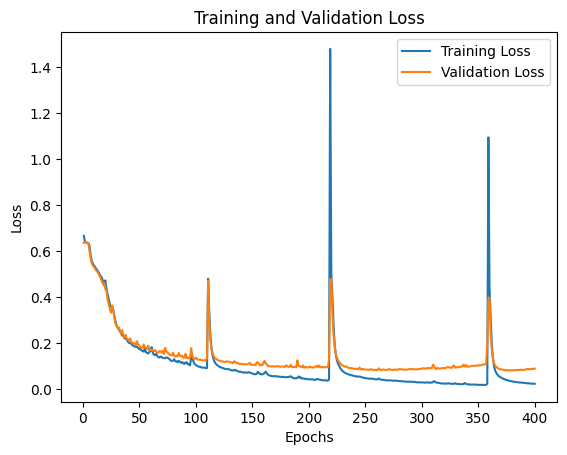

In [3]:
plot_loss(out_dir, '/logs.csv')

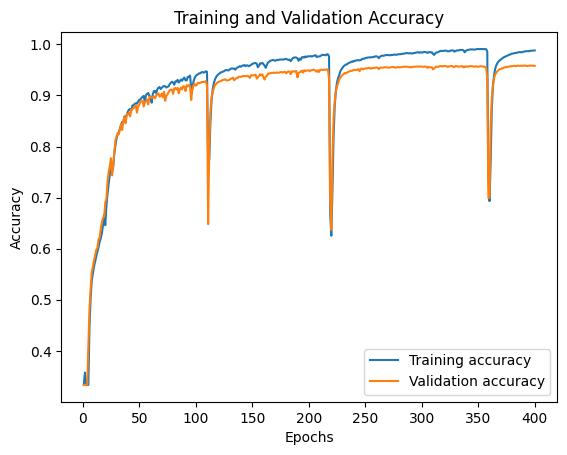

In [4]:
plot_accuracy(out_dir,'/logs.csv')

In [9]:
preds = []
labels = []

model = torch.load(f'{out_dir}/best.pt') 
model.eval() 
for x,y in iter(test_dataloader): 
    pred = model(x) 
    preds.append(pred.detach())

    labels.append(y)


preds = np.concatenate(preds, axis=0)
labels = np.concatenate(labels, axis=0)

preds = np.argmax(preds, axis=1)
labels = np.argmax(labels, axis=1)


report = classification_report(y_true=labels, y_pred=preds)
print(report)



report_for_csv = classification_report(y_true=labels, y_pred=preds, output_dict=True)
df_out = pd.DataFrame(report_for_csv).transpose()
df_out.to_csv(out_dir + '/classification_report.csv') 
print(df_out)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     48289
           1       0.97      0.97      0.97     48289
           2       0.95      0.96      0.96     48289

    accuracy                           0.96    144867
   macro avg       0.96      0.96      0.96    144867
weighted avg       0.96      0.96      0.96    144867



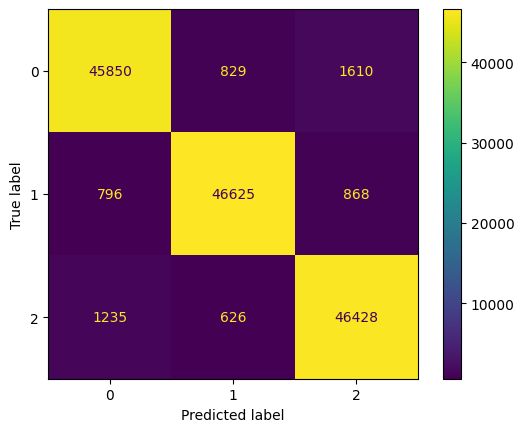

In [10]:
cm = confusion_matrix(y_true=labels,
                      y_pred=preds)


plt.Figure()
disp = ConfusionMatrixDisplay(cm,)

disp.plot(values_format='')
plt.savefig(out_dir + '/cm.png')

# Training Clinical no TL

In [11]:
out_dir = './models/clinical_no_TL'

if os.path.exists(out_dir):
    print("path exists")
else:
    os.makedirs(out_dir)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

path exists


In [12]:
train_dataset = H5Dataset('./TL_prepared_data/train/data.hdf5')
test_dataset = H5Dataset('./TL_prepared_data/test/data.hdf5')

batch_size = 16344
epochs = 400


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

len(train_dataset), len(test_dataset)

(46028, 43632)

In [13]:
model = Segmentation_Network_full(n_classes=4)
opt = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 
criterion = F.binary_cross_entropy  
model.to(device).float() 
print()

In [14]:
trainer = Trainer(model, opt, criterion, train_dataloader, test_dataloader, out_dir, epochs, device)

In [15]:
trainer.fit()

  0%|          | 0/400 [00:00<?, ?it/s]

EPOCH 1: Loss: 0.6839494705200195, Accuracy: 0.24992191791534424, Best_accuracy: 0.24992191791534424
Val_loss: 0.6681463122367859, Val_accuracy: 0.2542869448661804, Best_val_accuracy: 0.2542869448661804

EPOCH 2: Loss: 0.6493911743164062, Accuracy: 0.24982088804244995, Best_accuracy: 0.24992191791534424
Val_loss: 0.5890346765518188, Val_accuracy: 0.2542869448661804, Best_val_accuracy: 0.2542869448661804

EPOCH 3: Loss: 0.5876705050468445, Accuracy: 0.252602756023407, Best_accuracy: 0.252602756023407
Val_loss: 0.587451696395874, Val_accuracy: 0.3474995791912079, Best_val_accuracy: 0.3474995791912079

EPOCH 4: Loss: 0.5722450017929077, Accuracy: 0.28303492069244385, Best_accuracy: 0.28303492069244385
Val_loss: 0.5732210874557495, Val_accuracy: 0.2542869448661804, Best_val_accuracy: 0.3474995791912079

EPOCH 5: Loss: 0.5781124830245972, Accuracy: 0.25005969405174255, Best_accuracy: 0.28303492069244385
Val_loss: 0.5777882933616638, Val_accuracy: 0.2542869448661804, Best_val_accuracy: 0.347

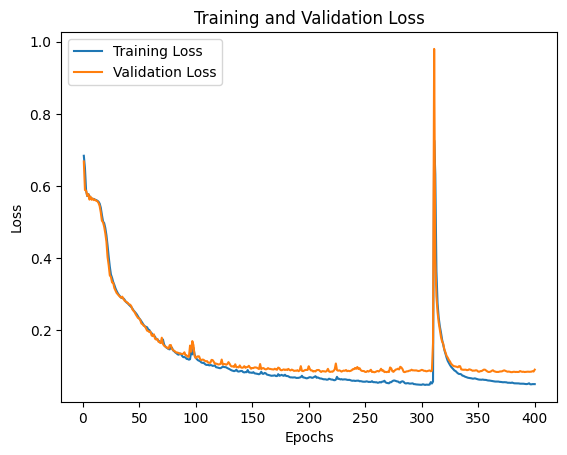

In [16]:
plot_loss(out_dir, '/logs.csv')

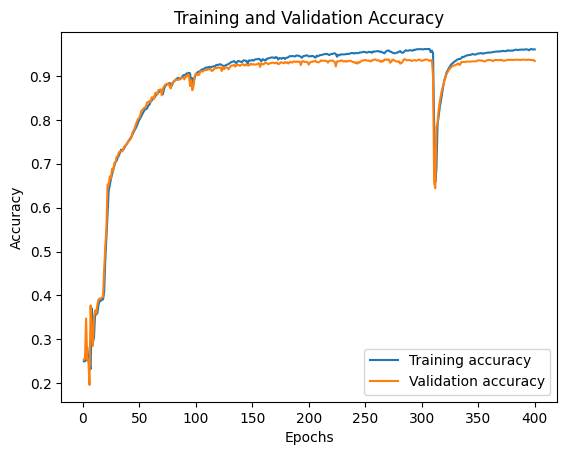

In [17]:
plot_accuracy(out_dir, '/logs.csv')

In [18]:
preds = []
labels = []

model = torch.load(f'{out_dir}/best.pt') 
model.eval() 
for x,y in iter(test_dataloader): 
    pred = model(x) 
    preds.append(pred.detach())

    labels.append(y)


preds = np.concatenate(preds, axis=0)
labels = np.concatenate(labels, axis=0)

preds = np.argmax(preds, axis=1)
labels = np.argmax(labels, axis=1)


report = classification_report(y_true=labels, y_pred=preds)
print(report)



report_for_csv = classification_report(y_true=labels, y_pred=preds, output_dict=True)
df_out = pd.DataFrame(report_for_csv).transpose()
df_out.to_csv(out_dir + '/classification_report.csv') 
print(df_out)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10908
           1       0.97      0.95      0.96     10908
           2       0.95      0.92      0.93     10908
           3       0.87      0.94      0.90     10908

    accuracy                           0.94     43632
   macro avg       0.94      0.94      0.94     43632
weighted avg       0.94      0.94      0.94     43632



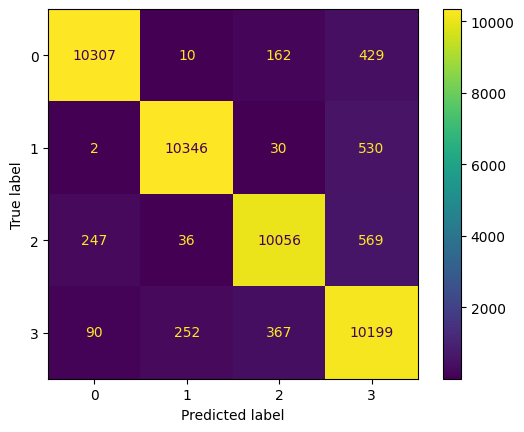

In [19]:
cm = confusion_matrix(y_true=labels,
                      y_pred=preds)


plt.Figure()
disp = ConfusionMatrixDisplay(cm,)

disp.plot(values_format='')
plt.savefig(out_dir + '/cm.png')

# Training Clinical with TL

In [20]:
out_dir = './models/clinical_TL'

if os.path.exists(out_dir):
    print("path exists")
else:
    os.makedirs(out_dir)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

path exists


In [21]:
m = torch.load('./models/ACDC/best.pt').cpu()
m.eval()

model = Segmentation_Network_full(n_classes=4)
for i in range(len(m.network)):
    layer = m.network[i]
    if type(layer) == torch.nn.modules.conv.Conv3d and layer.in_channels != 256:
        model.network[i].load_state_dict(layer.state_dict())

        for param in model.network[i].parameters():
            param.requires_grad = False

In [22]:
opt = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 
criterion = F.binary_cross_entropy  
model.to(device).float() 
print()

In [23]:
trainer = Trainer(model, opt, criterion, train_dataloader, test_dataloader, out_dir, epochs, device)

In [24]:
trainer.fit()

  0%|          | 0/400 [00:00<?, ?it/s]

EPOCH 1: Loss: 0.6782857179641724, Accuracy: 0.37358224391937256, Best_accuracy: 0.37358224391937256
Val_loss: 0.6571266651153564, Val_accuracy: 0.6603860259056091, Best_val_accuracy: 0.6603860259056091

EPOCH 2: Loss: 0.6454960703849792, Accuracy: 0.6364925503730774, Best_accuracy: 0.6364925503730774
Val_loss: 0.6191803812980652, Val_accuracy: 0.6172806024551392, Best_val_accuracy: 0.6603860259056091

EPOCH 3: Loss: 0.604380190372467, Accuracy: 0.6118971109390259, Best_accuracy: 0.6364925503730774
Val_loss: 0.572871208190918, Val_accuracy: 0.6201043128967285, Best_val_accuracy: 0.6603860259056091

EPOCH 4: Loss: 0.5594636797904968, Accuracy: 0.6141201257705688, Best_accuracy: 0.6364925503730774
Val_loss: 0.5373650789260864, Val_accuracy: 0.6192868947982788, Best_val_accuracy: 0.6603860259056091

EPOCH 5: Loss: 0.5343229174613953, Accuracy: 0.6080624461174011, Best_accuracy: 0.6364925503730774
Val_loss: 0.5294969081878662, Val_accuracy: 0.591936469078064, Best_val_accuracy: 0.660386025

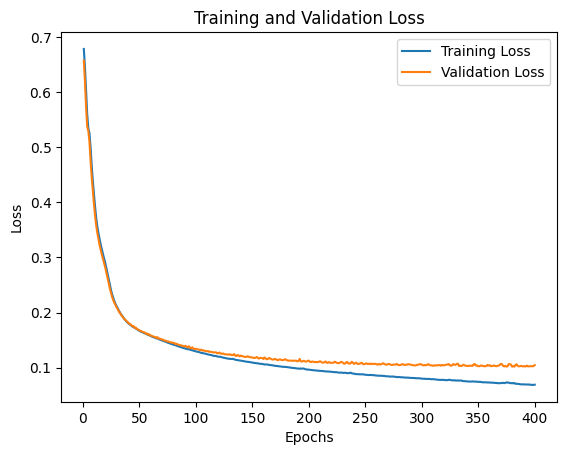

In [25]:
plot_loss(out_dir, '/logs.csv')

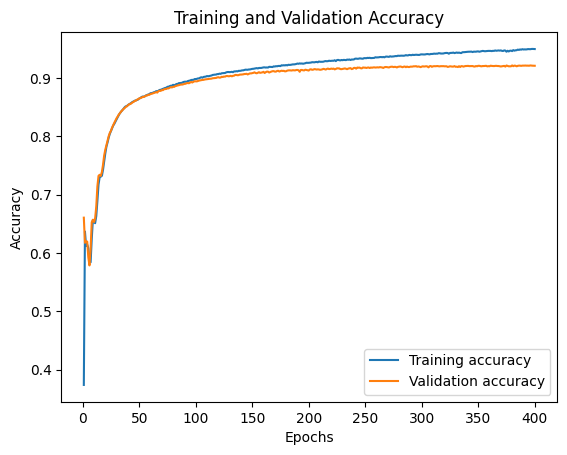

In [26]:
plot_accuracy(out_dir, '/logs.csv')

In [27]:
preds = []
labels = []

model = torch.load(f'{out_dir}/best.pt') 
model.eval() 
for x,y in iter(test_dataloader): 
    pred = model(x) 
    preds.append(pred.detach())

    labels.append(y)


preds = np.concatenate(preds, axis=0)
labels = np.concatenate(labels, axis=0)

preds = np.argmax(preds, axis=1)
labels = np.argmax(labels, axis=1)


report = classification_report(y_true=labels, y_pred=preds)
print(report)


report_for_csv = classification_report(y_true=labels, y_pred=preds, output_dict=True)
df_out = pd.DataFrame(report_for_csv).transpose()
df_out.to_csv(out_dir + '/classification_report.csv') 
print(df_out)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10908
           1       0.96      0.93      0.95     10908
           2       0.93      0.91      0.92     10908
           3       0.85      0.91      0.88     10908

    accuracy                           0.92     43632
   macro avg       0.92      0.92      0.92     43632
weighted avg       0.92      0.92      0.92     43632



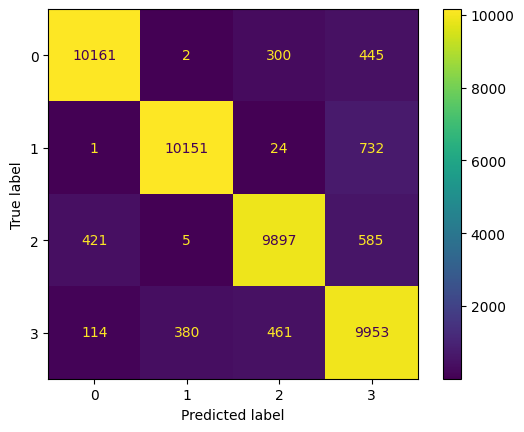

In [28]:
cm = confusion_matrix(y_true=labels,
                      y_pred=preds)


plt.Figure()
disp = ConfusionMatrixDisplay(cm,)

disp.plot(values_format='')
plt.savefig(out_dir + '/cm.png')